In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Set Seaborn theme
sns.set(style="whitegrid")

print("Libraries loaded successfully ✅")


Libraries loaded successfully ✅


In [4]:
# Load dataset
df = pd.read_csv("Titanic-dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Basic info
df.info()

# Summary stats
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Null values
print("\nMissing Values:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary Statistics:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
t

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder

# Label Encode 'Sex'
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# One-Hot Encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,True


In [10]:
# Columns to scale
scale_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
df[scale_cols] = scaler.fit_transform(df[scale_cols])

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,0.827377,"Braund, Mr. Owen Harris",1,-0.565736,0.432793,-0.473674,A/5 21171,-0.502445,False,True
1,2,1,-1.566107,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,0.432793,-0.473674,PC 17599,0.786845,False,False
2,3,1,0.827377,"Heikkinen, Miss. Laina",0,-0.258337,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,False,True
3,4,1,-1.566107,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,0.432793,-0.473674,113803,0.420730,False,True
4,5,0,0.827377,"Allen, Mr. William Henry",1,0.433312,-0.474545,-0.473674,373450,-0.486337,False,True


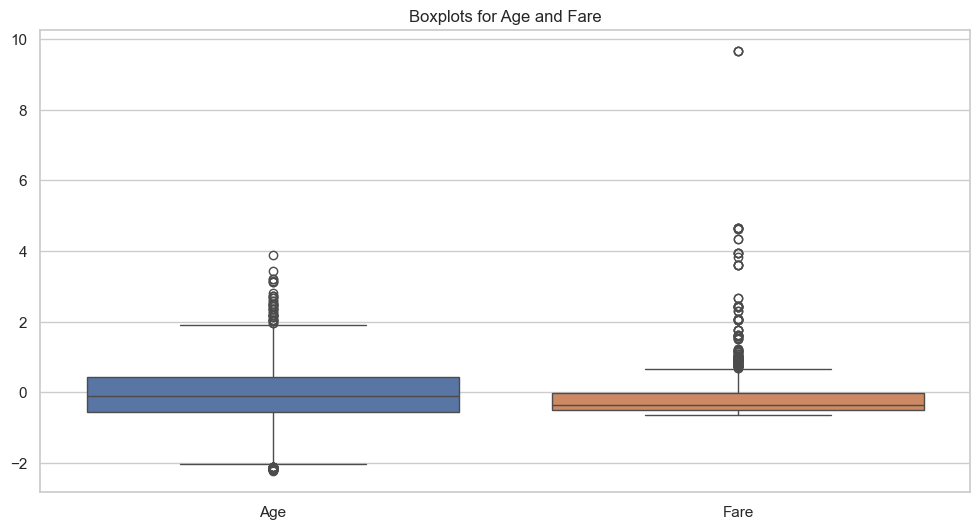

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplots for Age and Fare")
plt.show()


In [12]:
# IQR filtering for 'Fare'
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]

print(f"New shape after removing Fare outliers: {df.shape}")


New shape after removing Fare outliers: (775, 12)


In [13]:
df.to_csv("titanic_cleaned.csv", index=False)
print("Cleaned dataset saved as titanic_cleaned.csv ✅")


Cleaned dataset saved as titanic_cleaned.csv ✅
